In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
### 데이터 생성하기
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 
19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0,
22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6,
26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0,
42.0, 43.0, 43.0, 43.5, 44.0]
)

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
    1000.0, 1000.0]
    )

In [3]:
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                      perch_weight,
                                                                      random_state=42)

In [4]:
print(train_input)
print(test_input)
print(train_target)
print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [5]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [6]:
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [7]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [8]:
knr.score(test_input, test_target)

0.992809406101064

In [9]:
knr.score(train_input, train_target)

0.9698823289099254

In [10]:
### 예측데이터 : 50
### 산점도 시각화, 훈련데이터와 데이터, 이웃데이터 포함
knr.predict([[100]])

array([1010.])

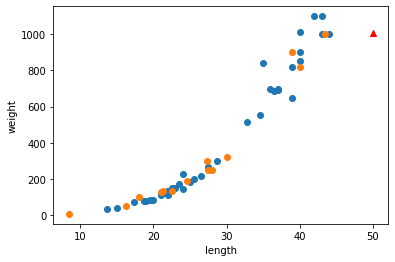

In [11]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.scatter(50,1010, marker="^", c='red')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

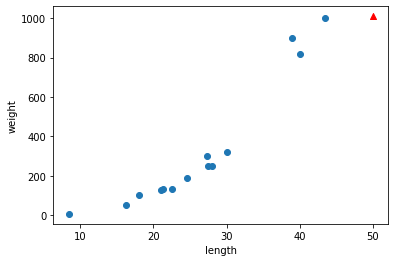

In [12]:
plt.scatter(test_input, test_target)
plt.scatter(50,1010, marker="^", c='red')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [30]:
distances, indexes = knr.kneighbors([[50]])
indexes

array([[34, 14,  8, 40,  6]], dtype=int64)

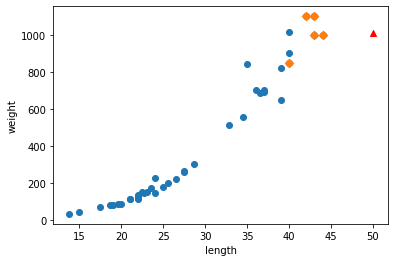

In [31]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50,1010, marker="^", c='red')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 선형회귀 (Linear Regression)
- 많이 사용되는 대표적인 회귀 알고리즘
- 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행시 초반에 주로 진행
- 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역량
- 직선을 "추세선" 이라고 합니다
- 선형회귀 알고리즘 : 1차 방정식(y=ax+b)
- 선형회귀 클래스(모델) : LinearRegression
- 사용되는 패키지 : sklearn.linear_model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
### 선형회귀 클래스(모델) 생성하기
lr = LinearRegression()
lr

LinearRegression()

In [17]:
### 사용데이터 : train_input, train_target, test_input, test_target
### 예측데이터 : 길이 50cm

# lr 모델 훈련 > 예측데이터로 예측하기
lr.fit(train_input, train_target)

LinearRegression()

In [18]:
lr.score(test_input, test_target)

0.824750312331356

In [19]:
lr.predict([[50]])

array([1241.83860323])

In [20]:
### 일차방정식의 기울기와 y절편값 확인하기
# 일차방정식 : y = ax + b
# a : 기울기(coef_)
# b : y절편(intercept_)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


In [21]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인하기
# 예측데이터로 사용할 수 있을지 확인
# 산점도를 이용해서 확인하기
# 훈련데이터, 예측데이터 산점도로 그리기

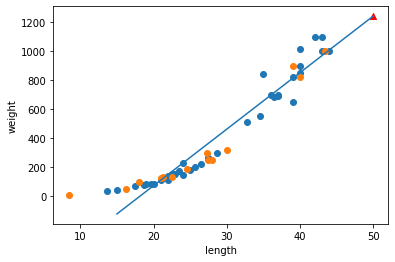

In [22]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.scatter(50,1241, marker='^', color='red')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
plt.plot([15,50],[lr.coef_ * 15 + lr.intercept_,
                  lr.coef_ * 50 + lr.intercept_])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [23]:
### 훈련데이터와 테스트데이터의 과적합여부 확인하기
# KNN은 과소적합이 나왔었음
# LR 모델은 개선이 되었는지 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 해석
# 테스트 결과가 다소 낮게 나왔으며, 훈련데이터는 높은 편
# 다소 차이는 있으나 우수한 모델로 평가할 수는 없음
# 단, 훈련데이터와 테스트데이터의 결정계수의 차이는
# 의심을 해봐야 함

### 그래프 왼쪽 하단의 산점도 분포가 조금 특이합니다
# 약간의 round(곡선)을 띄고 있음
# 추세선의 왼쪽 하단으로 직선을 연장했을때
# y축 0 이하로 넘어감. 무게는 0보다 작을 수 없음
# 음수를 예측하면 잘못된 모델

0.9398463339976041
0.824750312331356


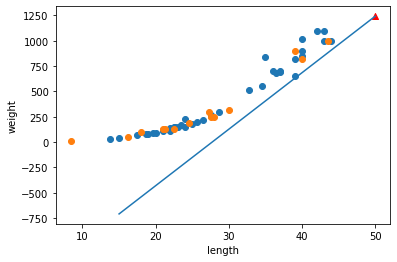

In [24]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.scatter(50,1241, marker='^', color='red')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
plt.plot([15,50],[lr.coef_ * 0 + lr.intercept_,
                  lr.coef_ * 50 + lr.intercept_])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 다항회귀분석 (Polynomial Regression)
- 다항식을 사용한 선형회귀를 "다항회귀"라고 합니다
- 다항식(이차방정식) : y = ax^2 + bx + c
- a와 b : 계수 (기울기 포함)
- c : y절편

In [25]:
### 훈련데이터 train_input을 [[제곱된 값 1개, 원래값 1개], [],[]]
### 변수 : train_poly

train_poly = np.column_stack((train_input**2,train_input))
train_poly.shape

(42, 2)

In [26]:
test_poly = np.column_stack((test_input**2, test_input))
test_poly.shape

(14, 2)

y = ax^2 + bx + c
a = 1.0143321093767301 b = -21.557924978837352 c =  116.0502107827827


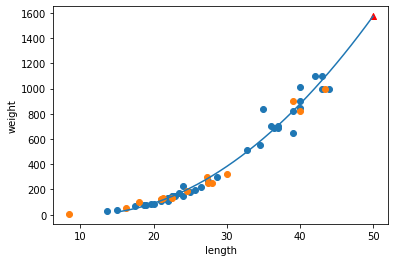

In [27]:
# 객체(모델) 생성
lr = LinearRegression()

# 훈련모델 생성
lr.fit(train_poly, train_target)

# 예측데이터 : 길이 50으로 무게 예측
lr.predict([[50**2,50]])

# 계수 확인 (corf_, intercept_)
print("y = ax^2 + bx + c")
print("a =",lr.coef_[0], "b =",lr.coef_[1], "c = ",lr.intercept_)

# 산점도 그리기 : 훈련데이터, 예측데이터, 추세선
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.scatter(50, 1573.9842, marker='^', color='red')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
point = np.arange(15,51)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + 116.05)

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [28]:
### 과적합 확인하기 (과대/과소)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 현업에서는 사용가능
# 연구, 특허, 논문에선 못 씀

0.9706807451768623
0.9775935108325122


In [29]:
### (해석)
# 전체적으로 정확도는 낮아졌음
# 그렇지만, 훈련/테스트의 결정계수는 유사하게 가까워졌기에
# 우수한 모델이라고 할 수 있음

# 다만, 아직 훈련이 테스트보다 낮은 과소적합을 보인다

### 그럼 어떻게 해소?
# 복잡도를 줄 수 있는 모델을 찾아야 함